# Explore Kestrel Segmentations

To install PyAudioAnalysis
```python
pip install pyAudioAnalysis
```

Or developer version

```python
git clone https://github.com/tyiannak/pyAudioAnalysis.git
cd pyAudioAnalysis
pip install -r ./requirements.txt
pip install -e .
cd ..
```

In [30]:
import matplotlib.pyplot as plt
import sound_segmentation

PSeg = sound_segmentation 
from pydub.utils import get_array_type
import array
from pyAudioAnalysis import ShortTermFeatures, MidTermFeatures
from numpy import int16

import os
import pyAudioAnalysis
import numpy as np
from pyAudioAnalysis import audioBasicIO as aIO
from pyAudioAnalysis import audioSegmentation as aS
from scipy.io.wavfile import write
import pandas as pd


<ipython-input-2-1483380e6863>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


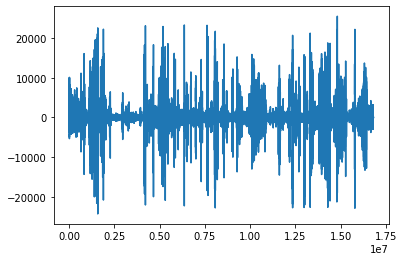

In [2]:
path = os.path.join(os.getcwd(), "../../", "inputs/mp3/mauritius_kestrel.mp3")

(fs,num_a,sound,_) = PSeg.load_data(path)
fig = plt.figure()
plt.plot(num_a)
fig.show()




<ipython-input-3-2f7d1fd48d5f>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


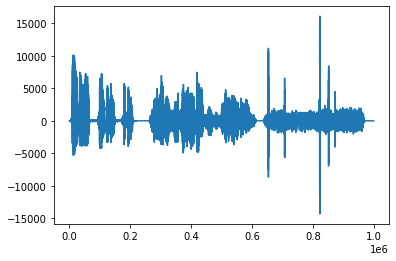

In [3]:
#sound = np.array(sound[0:1000])
#sound = np.transpose(sound)

left = sound.split_to_mono()[0]
bit_depth = left.sample_width * 8

array_type = get_array_type(bit_depth)
num_a = array.array(array_type, left._data)

fig = plt.figure()
plt.plot(num_a[0:1000000])
fig.show()


In [4]:

np.array(num_a)[0:10000000]

array([0, 0, 0, ..., 0, 0, 0], dtype=int16)

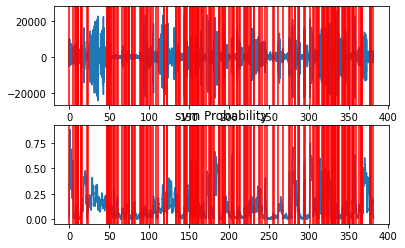

In [5]:
segments = aS.silence_removal(np.array(num_a)[0:10000000], fs, 0.020, 0.020, smooth_window = 1.0, weight = 0.1, plot = True)


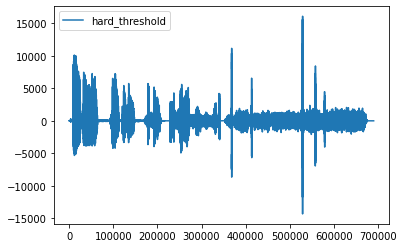

In [10]:

segs_th=[]
for ind,seg in enumerate(segments):
    if ind<6:
        onset = int(seg[0]*fs)
        offset = int(seg[1]*fs)
        wave = num_a[onset:offset]
        segs_th.extend(wave)
fig = plt.figure()
plt.plot(segs_th,label="hard_threshold")

plt.legend()
plt.show()

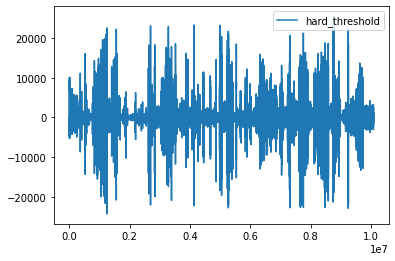

FileNotFoundError: [Errno 2] No such file or directory: '../../outputs/wav/kestrel_segs_th.wav'

In [32]:

segs_th=[]
for seg in segments:
    onset = int(seg[0]*fs)
    offset = int(seg[1]*fs)
    wave = num_a[onset:offset]
    segs_th.extend(wave)
fig = plt.figure()
plt.plot(segs_th,label="hard_threshold")

plt.legend()
plt.show()    




In [36]:
write("../kestrel_segs_th.wav", fs, int16(segs_th))


/home/user/git/forestogram/outputs/python_nbs


In [37]:
!ls ../../outputs/kestrel_segs_th.wav
!du -h ../../outputs/kestrel_segs_th.wav

../../outputs/kestrel_segs_th.wav
20M	../../outputs/kestrel_segs_th.wav


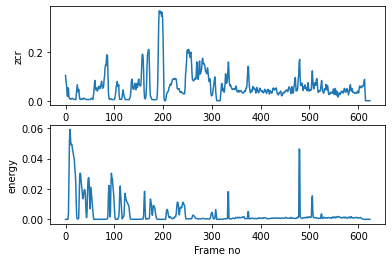

In [14]:
#from pyAudioAnalysis import audioBasicIO
F, f_names = ShortTermFeatures.feature_extraction(segs_th, fs, 0.050*fs, 0.025*fs)
plt.subplot(2,1,1); plt.plot(F[0,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[0]) 
plt.subplot(2,1,2); plt.plot(F[1,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[1]); plt.show()

In [26]:

df = pd.DataFrame([{ff_names:np.sum(ff) for ff, ff_names in zip(F, f_names)}])
df=df.T
df

,0
zcr,36.206443
energy,2.430687
energy_entropy,1897.339118
spectral_centroid,85.160900
spectral_spread,108.196787
...,...
delta chroma_9,-0.002683
delta chroma_10,-0.006736
delta chroma_11,-0.029804
delta chroma_12,-0.000367


In [50]:
midFeat,shortFeat,midFeatLabels=MidTermFeatures.mid_feature_extraction(
    segs_th, fs,
    0.43*fs, 0.43*fs,
    0.16*fs, 0.16*fs
)

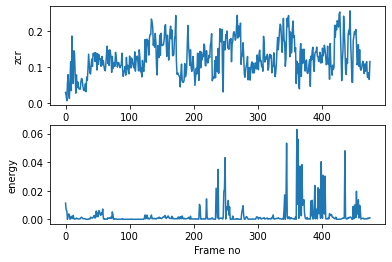

In [51]:
F = midFeat
plt.subplot(2,1,1); plt.plot(F[0,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[0]) 
plt.subplot(2,1,2); plt.plot(F[1,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[1]); plt.show()

In [52]:
df = pd.DataFrame([{ff_names:np.sum(ff) for ff, ff_names in zip(midFeat, midFeatLabels)}])
df=df.T
df

,0
zcr_mean,59.837420
energy_mean,1.321434
energy_entropy_mean,1327.699256
spectral_centroid_mean,92.118603
spectral_spread_mean,75.126745
...,...
delta chroma_9_std,7.914168
delta chroma_10_std,2.774824
delta chroma_11_std,6.010273
delta chroma_12_std,2.914803
